# `ecg_00.jpynb`: Read and plot ECG data

In this Jupyter notebook, we read and plot ECG data from a healthy subject.

## 1. Open an ECG file into the `ecg` variable
We want to read the file `ECG_hz.txt` from the `data` folder.  
We shall put the data into a variable named `ecg`.


### 1.1. Define the path to the ECG file

The path to the file is `data/ECG_hz.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECG_hz.txt`

In [32]:
fNameECG = "C:\\Users\\SCD UM\\HAH913E-2024-ECG_001\\ECGu (1).txt"

However, if we `%run` this notebook from another notebook, the path is expected from the other notebook. So we need a way to define the path to the file in a way that is independent of the notebook that is running the present notebook.

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "C:\\Users\\SCD UM\\HAH913E-2024-ECG_001\\ECGu (1).txt"

### 1.2. Read the ecg file

In [2]:
import numpy as np 

ecg = np.genfromtxt(fNameECG, delimiter=' ') 


# 2. Plot the content of the `egc` variable 

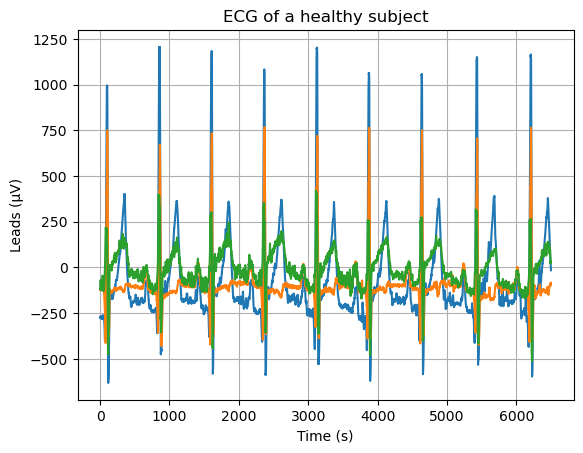

ecg_00.ipynb finished


In [3]:
import matplotlib.pyplot as plt 

plt.plot(ecg)

plt.title('ECG of a healthy subject')
plt.xlabel('Time (s)')
plt.ylabel('Leads (µV)') 

plt.grid(True)  # une grille

plt.show()



print("ecg_00.ipynb finished")


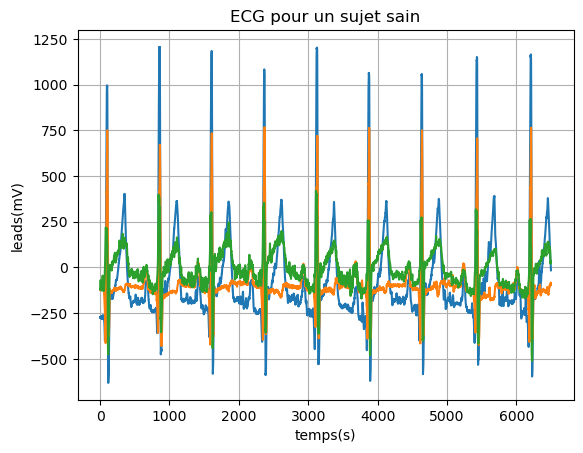

ecg_00.ipynb finished 


In [4]:
import matplotlib.pyplot as plt 

plt.plot(ecg)

plt.title('ECG pour un sujet sain')
plt.xlabel('temps(s)')
plt.ylabel('leads(mV)') 

plt.grid(True)


plt.show()

print("ecg_00.ipynb finished ")

Ecg 3 leads

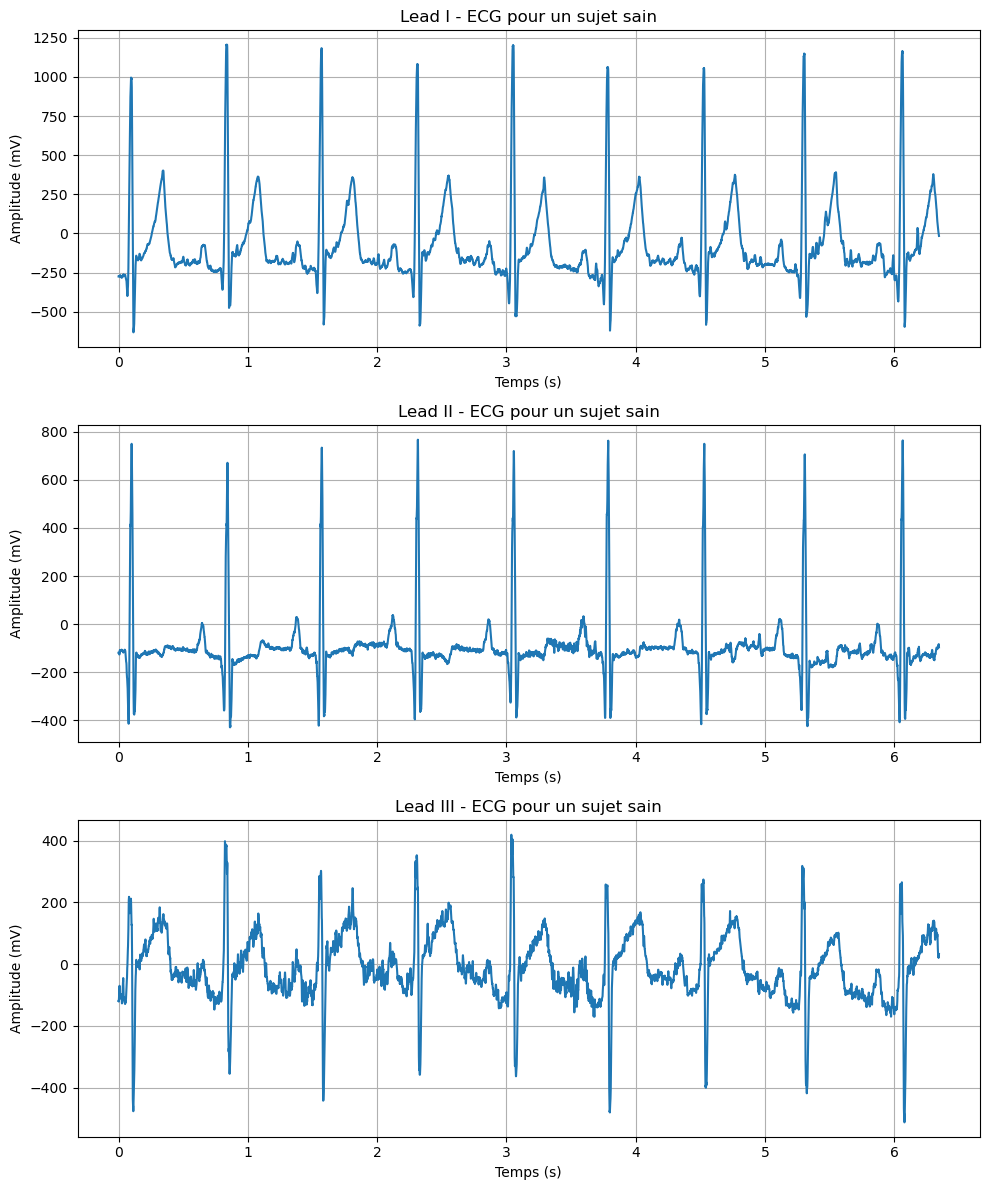

ecg_00.ipynb finished


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que 'ecg' est un tableau 2D où chaque colonne correspond à un lead
# ecg[:, 0] pour le lead I, ecg[:, 1] pour le lead II, ecg[:, 2] pour le lead III

# Fréquence d'échantillonnage de l'ECG (exemple : 1024 Hz)
sampling_frequency = 1024  # Hz
time = np.arange(len(ecg)) / sampling_frequency  # Axe du temps en secondes

# Création de la figure et des sous-graphiques (3 lignes, 1 colonne)
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Graphique pour le lead I
axs[0].plot(time, ecg[:, 0])  # Lead I
axs[0].set_title('Lead I - ECG pour un sujet sain')
axs[0].set_xlabel('Temps (s)')
axs[0].set_ylabel('Amplitude (mV)')
axs[0].grid(True)

# Graphique pour le lead II
axs[1].plot(time, ecg[:, 1])  # Lead II
axs[1].set_title('Lead II - ECG pour un sujet sain')
axs[1].set_xlabel('Temps (s)')
axs[1].set_ylabel('Amplitude (mV)')
axs[1].grid(True)

# Graphique pour le lead III
axs[2].plot(time, ecg[:, 2])  # Lead III
axs[2].set_title('Lead III - ECG pour un sujet sain')
axs[2].set_xlabel('Temps (s)')
axs[2].set_ylabel('Amplitude (mV)')
axs[2].grid(True)

# Ajustement de l'affichage des graphiques
plt.tight_layout()
plt.show()

print("ecg_00.ipynb finished")


low pass filtering with plot

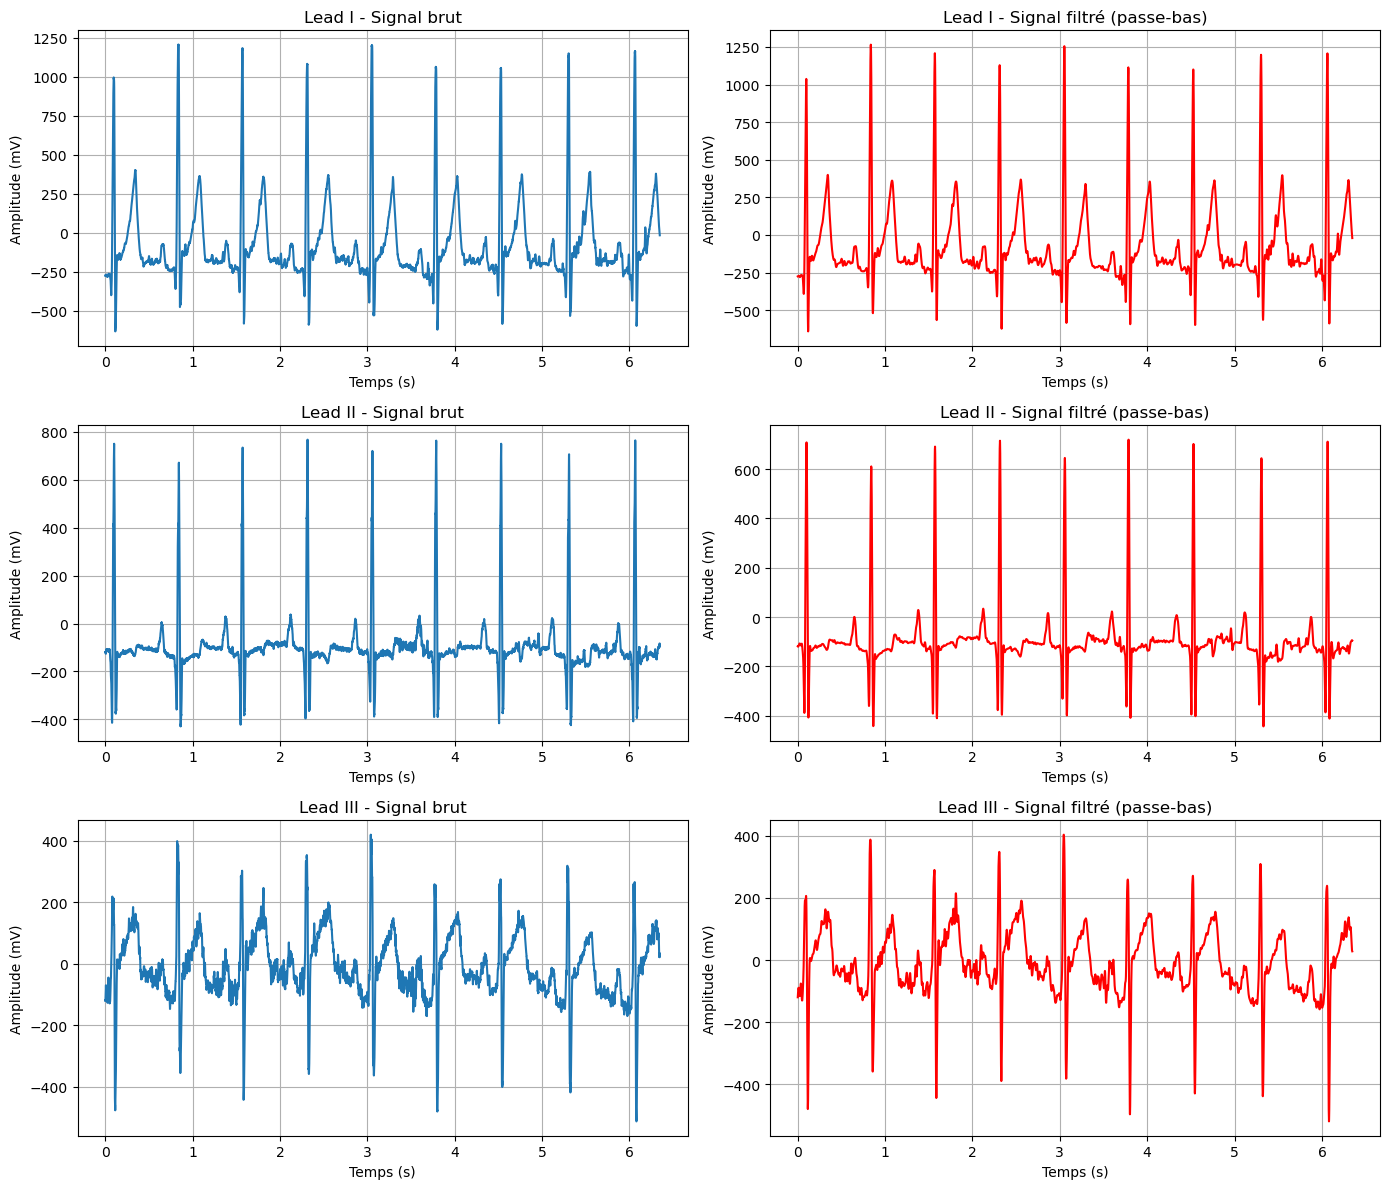

ecg_00.ipynb finished


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Paramètres du filtre passe-bas
sampling_frequency = 1024  # Hz
cutoff_frequency = 50  # Fréquence de coupure du filtre en Hz (exemple : 50 Hz)

# Création du filtre passe-bas Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Appliquer le filtre passe-bas
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)  # Utilisation de filtfilt pour éviter le déphasage
    return y

# Appliquer le filtre à chaque lead du signal ECG
ecg_filtered_1 = lowpass_filter(ecg[:, 0], cutoff_frequency, sampling_frequency)
ecg_filtered_2 = lowpass_filter(ecg[:, 1], cutoff_frequency, sampling_frequency)
ecg_filtered_3 = lowpass_filter(ecg[:, 2], cutoff_frequency, sampling_frequency)

# Création de l'axe du temps
time = np.arange(len(ecg)) / sampling_frequency  # Temps en secondes

# Création de la figure avec 6 sous-graphiques (3 leads avec signal brut + filtré)
fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # 3 lignes, 2 colonnes

# Lead I - Signal brut
axs[0, 0].plot(time, ecg[:, 0])
axs[0, 0].set_title('Lead I - Signal brut')
axs[0, 0].set_xlabel('Temps (s)')
axs[0, 0].set_ylabel('Amplitude (mV)')
axs[0, 0].grid(True)

# Lead I - Signal filtré
axs[0, 1].plot(time, ecg_filtered_1, color='r')
axs[0, 1].set_title('Lead I - Signal filtré (passe-bas)')
axs[0, 1].set_xlabel('Temps (s)')
axs[0, 1].set_ylabel('Amplitude (mV)')
axs[0, 1].grid(True)

# Lead II - Signal brut
axs[1, 0].plot(time, ecg[:, 1])
axs[1, 0].set_title('Lead II - Signal brut')
axs[1, 0].set_xlabel('Temps (s)')
axs[1, 0].set_ylabel('Amplitude (mV)')
axs[1, 0].grid(True)

# Lead II - Signal filtré
axs[1, 1].plot(time, ecg_filtered_2, color='r')
axs[1, 1].set_title('Lead II - Signal filtré (passe-bas)')
axs[1, 1].set_xlabel('Temps (s)')
axs[1, 1].set_ylabel('Amplitude (mV)')
axs[1, 1].grid(True)

# Lead III - Signal brut
axs[2, 0].plot(time, ecg[:, 2])
axs[2, 0].set_title('Lead III - Signal brut')
axs[2, 0].set_xlabel('Temps (s)')
axs[2, 0].set_ylabel('Amplitude (mV)')
axs[2, 0].grid(True)

# Lead III - Signal filtré
axs[2, 1].plot(time, ecg_filtered_3, color='r')
axs[2, 1].set_title('Lead III - Signal filtré (passe-bas)')
axs[2, 1].set_xlabel('Temps (s)')
axs[2, 1].set_ylabel('Amplitude (mV)')
axs[2, 1].grid(True)

# Ajustement de l'affichage des sous-graphiques
plt.tight_layout()
plt.show()

print("ecg_00.ipynb finished")
